In [17]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
import statsmodels.stats.outliers_influence as oi
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('Churn.csv')

"""----------------------------DATA PREPARATION--------------------------"""

for i in df.columns:
    df[i]=df[i].replace(" ",np.NaN)
    
#print (df.isnull().sum())

    
df.dropna(inplace=True)
df = df.reset_index()[df.columns]
#print (df.isnull().sum())
'''def tenure_lab(t) :
    
    if t <= 12 :
        return 1
    elif (t > 12) & (t <= 24 ):
        return 2
    elif (t > 24) & (t <= 48) :
        return 3
    elif (t > 48) & (t <= 60) :
        return 4
    elif t > 60 :
        return 5

df["tenure"]=df["tenure"].map(tenure_lab)'''


#since we have 72 categories in tenure we will reduce the number of categories in it
#therefoe we made above function and to check how many categories each column has now,we are using the following loop

for c_n in df.columns:
    #print c_n
   # if X[c_n]=='object' :
    unique_cat=df[c_n].nunique()
    #print ("Feature", c_n,"has", unique_cat,"unique categories")


X=df.drop('Churn',1)
Y=df.Churn

X=X.drop('customerID',1)

todummy_list  =X.nunique()[X.nunique() < 6].keys().tolist()

num_cols   = [x for x in X.columns if x not in todummy_list]
'''todummy_list.remove('tenure')
num_cols.insert(3,'tenure')'''
X_org=X.copy()

for i in todummy_list:
    dummies= pd.get_dummies(X[i],prefix=i)
    #print dummies
    #dummies=dummies.iloc[:,1:]
    X=X.drop(i,1)
    X=pd.concat([dummies,X],axis=1)
X=X.drop(['StreamingTV_No internet service','StreamingMovies_No internet service','TechSupport_No internet service','DeviceProtection_No internet service','OnlineBackup_No internet service'],axis=1)
    
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
Y= le.fit_transform(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)


from sklearn.preprocessing import StandardScaler
# Fitting parameters for scaling x_train for the numerical columns 
std = StandardScaler().fit(x_train[num_cols])
#Transforming the the original data
x_train_transformed=std.transform(x_train[num_cols])
x_train_transformed_df = pd.DataFrame(x_train_transformed,columns=num_cols)
x_train=x_train.drop(num_cols,1)
x_train=pd.concat([x_train.reset_index(drop=True),x_train_transformed_df.reset_index(drop=True) ],axis=1)

#Transforming the the test data's numerical with x_train scaled parameters
x_test_transformed=std.transform(x_test[num_cols])
x_test_transformed_df = pd.DataFrame(x_test_transformed,columns=num_cols)
x_test=x_test.drop(num_cols,1)
x_test=pd.concat([x_test.reset_index(drop=True),x_test_transformed_df .reset_index(drop=True) ],axis=1)

'''std = StandardScaler().fit(X[num_cols])
x_transformed=std.transform(X[num_cols])
x_transformed_df=pd.DataFrame(x_transformed,columns=num_cols)
x_kf=X.drop(num_cols,1)
x_kf=pd.concat([x_kf.reset_index(drop=True),x_transformed_df.reset_index(drop=True) ],axis=1)'''


'std = StandardScaler().fit(X[num_cols])\nx_transformed=std.transform(X[num_cols])\nx_transformed_df=pd.DataFrame(x_transformed,columns=num_cols)\nx_kf=X.drop(num_cols,1)\nx_kf=pd.concat([x_kf.reset_index(drop=True),x_transformed_df.reset_index(drop=True) ],axis=1)'

In [18]:
print(num_cols)
print(todummy_list)
x_train.shape

['tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


(5625, 41)

In [19]:
def roc_plot(clf_obj,x_test,y_test,predictions):
    
    # all parameters not specified are set to their defaults
    
   
        
        
        
    
 
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    
    print("tpr=",tpr," and 1-fpr=", 1-fpr)

    #plot no skill
    from matplotlib import pyplot
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, predictions)
    print('AUC: %.3f' % auc)
    '''probs = m.predict_proba(x_test)
    probs = probs[:, 1]


    fpr1, tpr1, thresholds1 = roc_curve(y_test, probs)

    #plot no skill
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr1, tpr1, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc)'''


    import matplotlib.pyplot as plt
    import seaborn as sns

    score = clf_obj.score(x_test, y_test)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title =' Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
clf_gini = DecisionTreeClassifier()

gs = GridSearchCV(clf_gini, param_grid={'max_depth' :[5,7,8,10,15,20,23,25,30,35,100],'max_features':[8,12,14,16,20,24,28,29,35]},scoring='roc_auc')
gs.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 7, 8, 10, 15, 20, 23, 25, 30, 35, 100], 'max_features': [8, 12, 14, 16, 20, 24, 28, 29, 35]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [21]:
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
c=0
for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    c=c+1
    print("%d) %0.3f (+/-%0.03f) for %r"% (c,mean, std * 2, params))

print("Best score: %0.4f" % gs.best_score_)

print("Best parameters:\n",gs.best_params_)


print("Best estimator:\n",gs.best_estimator_)

1) 0.811 (+/-0.034) for {'max_depth': 5, 'max_features': 8}
2) 0.807 (+/-0.029) for {'max_depth': 5, 'max_features': 12}
3) 0.828 (+/-0.014) for {'max_depth': 5, 'max_features': 14}
4) 0.823 (+/-0.019) for {'max_depth': 5, 'max_features': 16}
5) 0.822 (+/-0.010) for {'max_depth': 5, 'max_features': 20}
6) 0.825 (+/-0.012) for {'max_depth': 5, 'max_features': 24}
7) 0.826 (+/-0.019) for {'max_depth': 5, 'max_features': 28}
8) 0.828 (+/-0.007) for {'max_depth': 5, 'max_features': 29}
9) 0.833 (+/-0.013) for {'max_depth': 5, 'max_features': 35}
10) 0.807 (+/-0.020) for {'max_depth': 7, 'max_features': 8}
11) 0.812 (+/-0.013) for {'max_depth': 7, 'max_features': 12}
12) 0.810 (+/-0.009) for {'max_depth': 7, 'max_features': 14}
13) 0.817 (+/-0.013) for {'max_depth': 7, 'max_features': 16}
14) 0.807 (+/-0.008) for {'max_depth': 7, 'max_features': 20}
15) 0.807 (+/-0.012) for {'max_depth': 7, 'max_features': 24}
16) 0.802 (+/-0.017) for {'max_depth': 7, 'max_features': 28}
17) 0.811 (+/-0.017

In [22]:
m=gs.best_estimator_
print (m)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=35, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1038
           1       0.59      0.57      0.58       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.79      0.78      1407

[[894 144]
 [158 211]]
tpr= [0.         0.57181572 1.        ]  and 1-fpr= [1.         0.86127168 0.        ]


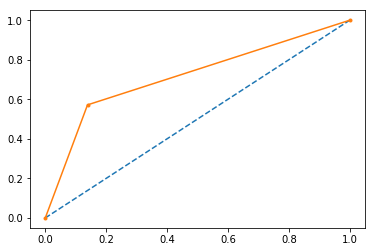

AUC: 0.717


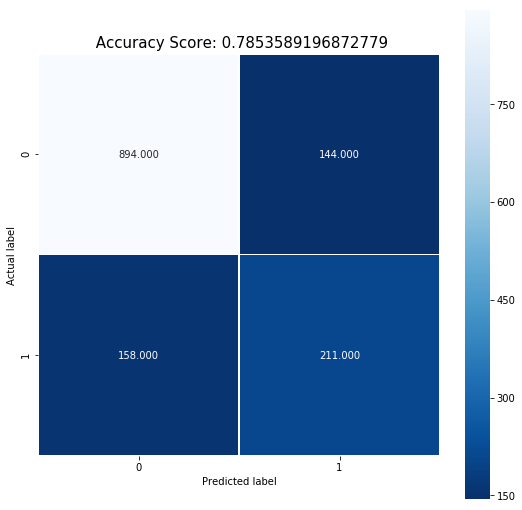

In [23]:
model=m.fit(x_train, y_train)
predictions = model.predict(x_test)
from sklearn import metrics

mett=metrics.classification_report(y_test,predictions)
print (mett)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


roc_plot(m,x_test,y_test,predictions)

In [24]:
m


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=35, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')